<a href="https://colab.research.google.com/github/mrunalmania/Pytorch-Learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch WorkFlow

In [ ]:
import torch
from torch import nn # nn contains all building block for neural networks
import matplotlib.pyplot as plt

# Version of torch
torch.__version__

'1.13.1+cu116'

##  1. Data (preparing and loading)

Data can be almost anything in machine learning
* Excel spreadsheet
* Images of any kind
* Videos
* Audios (songs)
* texts
* DNA

Machine learning is a game of two parts.
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation.

Lets create some *known* data using the linear regression.

We will use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# lets create a known parameter
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

## Splitting dataset into training and testing (most important concept in machine learning)

Lets create training and test set with our data

In [ ]:
train_split = int(0.8*len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

## Visulize the building blocks

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))

  # Plot the train data
  plt.scatter(train_data,train_labels, c='b',s=4, label='Train Data')

  #plot the test data
  plt.scatter(test_data,test_labels,c='g', s=4, label='Test Data')

  #plot the predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  
  #set the legend
  plt.legend(prop={'size': 14})


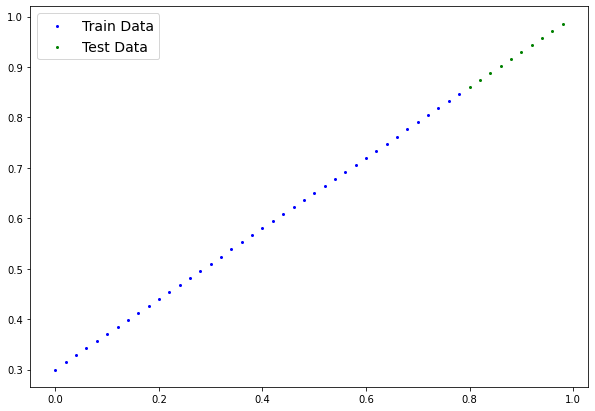

In [ ]:
plot_predictions()

## 2. Build model

What our model does :
start with random values (weight and bias)
look at the training data, and adjust the random values to better represent (or get closer to) ideal values (the weight and bias value we use to create the data).

How does it do so?
Through 2 main algorithm
1. Gradient Descent
2. Back propogation.

In [ ]:
from torch._C import dtype
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  #forward method to define computation in model
  def forward(self, X: torch.Tensor) -> torch.Tensor: # -> x is the input data
    return self.weights * X + self.bias
  
  

### Discussing some of the most important building blocks

* torch.nn -> contains all of the building blocks for computational graphs (a neural network considered as a computational graph).

* torch.nn.parameter -> what parameter should our model try and learn, often pytorch layer from torch.nn will set these.

* torch.nn.module -> The base class for all neural network modules, if you subclass it, you should overwrite the forward().

* torch.optim -> this is where the optimizers in pytorch live, they will help with gradient descent.

* def forward() -> All nn.module subclasses requires you to overwrite forward(),
this method defines what happens in the forward computation.

## checking out the internals of our pytorch model
 
checking the contents of our model
So we can check our model parameter or what's inside our model using `.parameters()`

In [ ]:
torch.manual_seed(42)

# object of linear regression class
model_0  = LinearRegressionModel()
# list the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions with our model

## Making prediction using `torch.inference_mode()`

To check the our model's predicting power, let see how well it can predict the `y_test` based on `X_test`.

When we pass our data through model, it gonna run it through forward() method.


In [ ]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0.forward(X_test)

# we can do something similer with torch.no_grad(), however torch.inference_mode() is preffered
# with torch.no_grad():
  # y_preds = model_0.forward(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

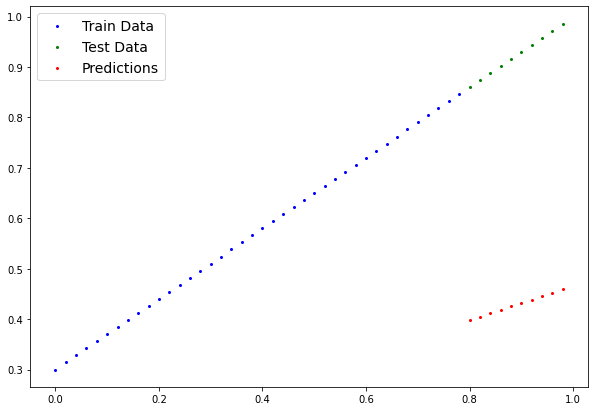

In [ ]:
plot_predictions(predictions=y_preds)

### Training a model with Pytorch (intuition building)

The whole idea of training is for a model to move from *unknown* parameter (this may be random) to *known* parameter

Or in other words, poor representation of the data to better representation of the data.

One way to measure, how poor or how wrong your model predictions are is to use a loss function.

* Note : Loss function may also be called as Cost function or criterion in different areas. For our case, we are going to refer to it as Loss Function.

Things we need to train

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizers:** Takes into account a loss of a model and adjust the model's parameter(e.g weight and bias) to improve the loss function.

And specifically for pytorch, we need

* A training loop
* A testing loop

In [ ]:
# check out our model parameter (parameter is a value that our model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setting up a loss function
loss_f1 = nn.L1Loss()

# setting up an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) # lr = learning rate, probably the most important hyperparameter that you can set.

In [ ]:
loss_f1

L1Loss()

## Pytorch training a loop intuition

A couple of things we need in a training loop

0. Loop through the data
1. Forward Pass ( this involves the data moving through our model's `forward()` functions) to make predictions on data - also called as forward propogation.

2. Calculate the loss (compare the forward pass predictions to the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through our model to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data
epochs = 100

# Tracking...
epoch_count = []
loss_values = []
test_loss_values = []

# 0 loop through the data ...
for epoch in range(epochs):
  # sets the model to training mode.
  model_0.train() # train mode in pytorch sets all parameters that require the gradients to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_f1(y_pred,y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (gradient descent)
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop... so we have to zero them above in step 3 for the next iteration of the loop.

  #Testing
  model_0.eval() # turns off the different setting of model for eavaluation and testing(dropout and batch norm layers)
  with torch.inference_mode(): #turns off the gradient setting and couple of more things behind the scene.
  # with torch.no_grad(): # you may also see torch.no_grad in older pytorch codes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_f1(test_pred,y_test)


  # print our what's happenin
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
# plot the loss curves
epoch_count, loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

Text(0.5, 1.0, 'Training and testing curve')

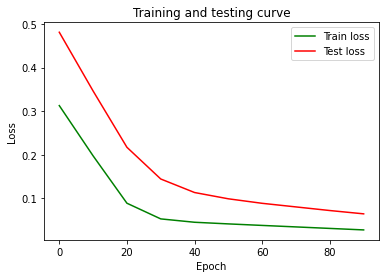

In [ ]:
# plot the training and testing loss curve
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label='Train loss', color = 'green')
plt.plot(epoch_count,test_loss_values, label='Test loss', color = 'red')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and testing curve')

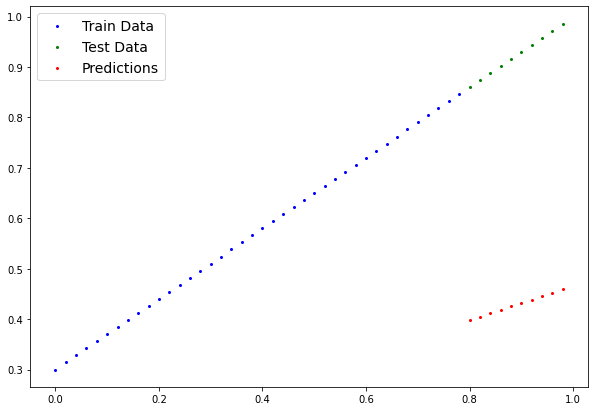

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

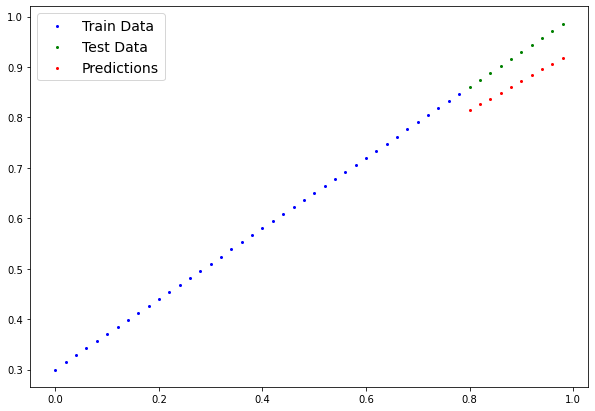

In [ ]:
plot_predictions(predictions=y_preds_new)

### Saving and loading model in pytorch

There are three main ways to save and load the model in pytorch

1. `torch.save()` -> allows you to save the python object in python pickle format.

2. `torch.load()` -> allows you to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` -> this allows you to load model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Saving our pytorch model

from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save the model 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model.pth


## Load the pytorch model
Since we saved our model's `state_dict()` rather the entire model, we will create a new instance of our model class and load the saved `state_dict()`

In [ ]:
# load the model

model_01 = LinearRegressionModel()
model_01.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
model_01.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

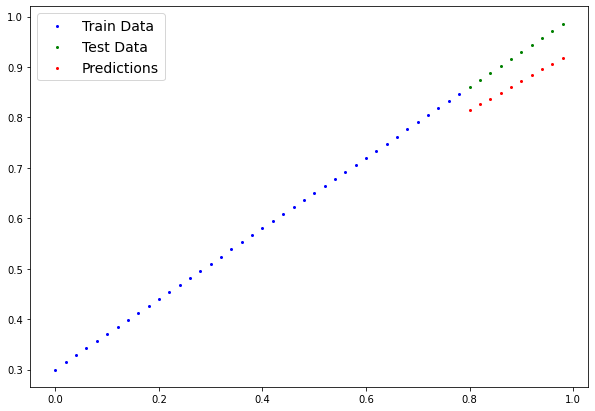

In [ ]:
# makes some predictions with loaded model
model_01.eval()
with torch.inference_mode():
  y_preds_load = model_01(X_test)

plot_predictions(predictions=y_preds_load)

## Putting it all together
 lets go back throgh the steps above and see it all in one place

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check the pytorch version
torch.__version__

'1.13.1+cu116'

Lets create device agnostic code
This means if we have got access to a GPU, our code will use it. (for potentially faster computing)

If no GPU is available, the code will default to using CPU.

In [ ]:
# lets setup the device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

# 1 Data

In [ ]:
# create some data using linear regression formula of y = weight*X+bias
weight = 0.7
bias = 0.3

# Create a range values
start = 0
end = 1
step  = 0.02

# Create a X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.3000],
         [0.3140],
         [0

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# split the data
train_split = int(0.8*len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

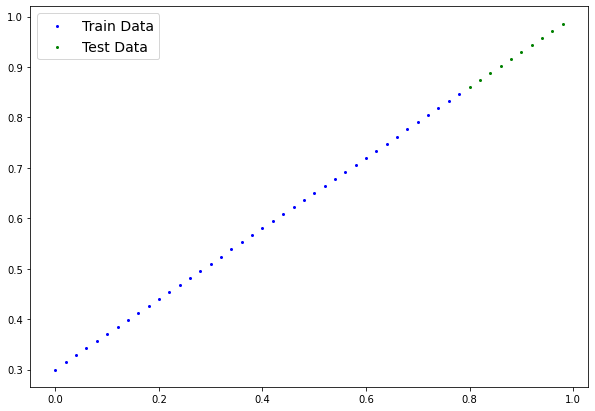

In [ ]:
#plot the data
# Note: if you don't have plot prediction function loaded this will give error.
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
from torch.nn.modules import linear
# building a pytorch model by subclassing nn.Module class
class LinearRegressionModelV2(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # use nn.Linear() to creating the model parameters. / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)
  
# set the manual seed
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2,model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check model's current device
next(model_2.parameters()).device

device(type='cpu')

In [ ]:
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

## Training

For training we need
1. Loss function
2. Optimizer
3. Training loop
4. Testing loop

In [ ]:
# set up the loss function
loss_fn_1 = nn.L1Loss()

# set up an optimizers
optimizer1 = torch.optim.SGD(params = model_2.parameters(),lr = 0.01)

In [ ]:
# training loop
torch.manual_seed(42)

#set epoch
epochs = 200

#put data in target device -> device agnostic code
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
model_2.to(device)
# print(device)

#tracking..
epoch_count_1 = []
loss_value_1 = []
test_loss_value_1 = []

# loop through the data
for epoch in range(epochs):
  # set training mode
  model_2.train()

  # 1 forward pass
  y_pred_1 = model_2(X_train)

  # Calculate loss
  loss = loss_fn_1(y_pred_1,y_train)

  # Optimizer zero_grad
  optimizer1.zero_grad()
 
  # backward propagtion on loss with respect to model perameters
  loss.backward()

  # step the optimizer (gradient descent)
  optimizer1.step()

  # testing..
  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test)
  
  test_loss = loss_fn_1(test_pred,y_test)

  #print what's happenin
  if epoch%10 == 0:
    print(f"Epoch {epoch} | loss value : {loss} | test loss value : {test_loss}")

  


cuda
Epoch 0 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 10 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 20 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 30 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 40 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 50 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 60 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 70 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 80 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 90 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 100 | loss value : 0.0012645035749301314 | test loss value : 0.013801801018416882
Epoch 110 | loss value : 0.00126450357

In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

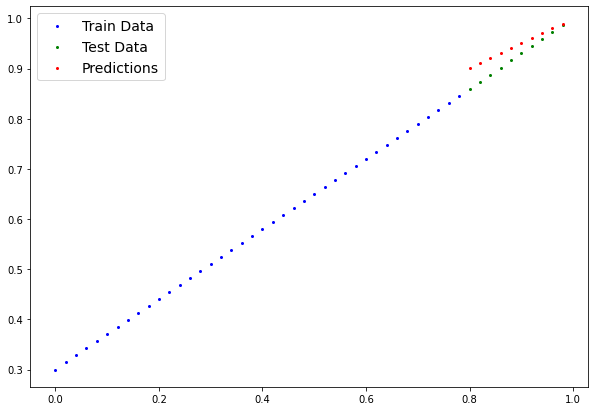

In [ ]:
from torch.autograd.grad_mode import inference_mode
model_2.eval()
with inference_mode():
  y_preds_2 = model_2(y_test)
y_preds_2
plot_predictions(train_data=X_train.cpu().numpy(),train_labels=y_train.cpu().numpy(),test_data=X_test.cpu().numpy(),test_labels=y_test.cpu().numpy(), predictions=y_preds_2.cpu().numpy())

In [ ]:
#save and load our model
from pathlib import Path
model_path = Path('models')
model_path.mkdir(parents=True,exist_ok=True)

#create model save path
model_name = 'model2_python_workflow.pth'
model_save_path = model_path/model_name

# save the model state dict
torch.save(obj=model_2.state_dict(),f=model_save_path )


In [ ]:
#load the model_2

#create a new instance
load_m2 = LinearRegressionModelV2()

#load the model's state_dict
load_m2.load_state_dict(torch.load(model_save_path))

# put the loaded model to the device
load_m2.to(device)




LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
load_m2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
from math import inf
# Evaluate the loaded model
load_m2.eval()
with inference_mode():
  pred_load = load_m2(X_test)

pred_load == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')